# Case Study on Probability for Data Science

Problem Statement:
To make a suitable machine learning algorithm to predict if the mushroom is
edible or poisonous (e or p) using the given dataset.
(Along with other ML algorithms, Naïve Bayes’ Classifier should be applied)
Also, if some data pre-processing is necessary do that as well.

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
data = pd.read_csv('mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [70]:
data.shape

(8124, 23)

### Preprocessing

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [72]:
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

No null values present in the dataset

In [73]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for column in data.columns:
    data[column] = LE.fit_transform(data[column])

In [74]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [75]:
data['veil-type'].unique()

array([0])

Dropping the column veil-type as it contains only zeros

In [76]:
data=data.drop(['veil-type'],axis=1)

In [77]:
#Obtaining correlation

<AxesSubplot:>

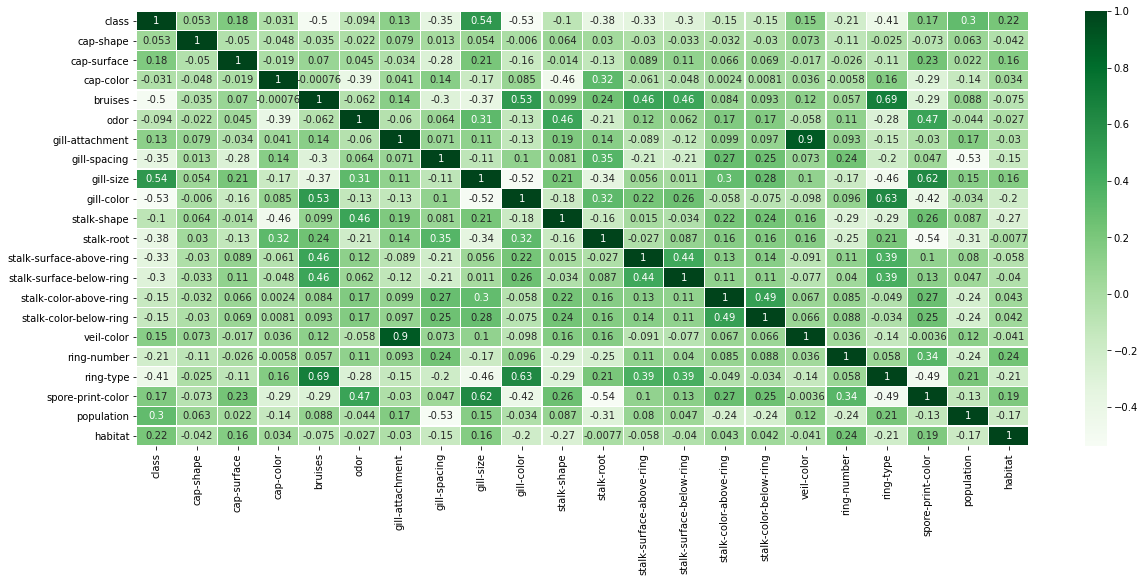

In [78]:
correlation_values = data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(correlation_values,annot=True,linewidth=0.2,cmap='Greens')


In [79]:
#Splitting the data feature and target

In [80]:
x = data.drop(['class'],axis=1)
y = data['class']

In [81]:
#Standard scaling

In [82]:
# Standard Scaling
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x = pd.DataFrame(std.fit_transform(x), columns = x.columns)
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.029712,0.140128,-0.198250,1.185917,0.881938,0.162896,-0.438864,1.494683,-0.228998,-1.144806,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
1,1.029712,0.140128,1.765874,1.185917,-1.970316,0.162896,-0.438864,-0.669038,-0.228998,-1.144806,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.250471,-1.313108,-0.295730
2,-2.087047,0.140128,1.373049,1.185917,-0.544189,0.162896,-0.438864,-0.669038,0.053477,-1.144806,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.250471,-1.313108,0.867149
3,1.029712,0.953270,1.373049,1.185917,0.881938,0.162896,-0.438864,1.494683,0.053477,-1.144806,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
4,1.029712,0.140128,-0.591075,-0.843230,0.406562,0.162896,2.278612,-0.669038,-0.228998,0.873511,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,-1.272216,-0.250471,-2.910546,-0.295730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,-0.216992,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,1.748325,-1.144806,...,0.683778,0.586385,-0.429288,-0.416681,-3.979055,-0.256132,0.948081,-1.509643,-2.111827,0.285710
8120,1.029712,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,1.748325,-1.144806,...,0.683778,0.586385,-0.429288,-0.416681,-8.100146,-0.256132,0.948081,-1.509643,0.284330,0.285710
8121,-0.840343,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,0.053477,-1.144806,...,0.683778,0.586385,-0.429288,-0.416681,-3.979055,-0.256132,0.948081,-1.509643,-2.111827,0.285710
8122,-0.216992,0.953270,-0.198250,-0.843230,1.832689,0.162896,-0.438864,1.494683,-1.358896,0.873511,...,0.683778,-0.893053,0.622441,0.631991,0.142037,-0.256132,-1.272216,1.428426,0.284330,0.285710


In [83]:
#Splitting to test train set

In [84]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 42) 

## Modelling

### 1. Logistic Regression

In [85]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train,y_train)
print(f"Logistic Regression: {logit_model.score(x_test, y_test)}")

Logistic Regression: 0.9544895448954489


### 2. Decision Tree model

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
dect_model=DecisionTreeClassifier()
dect_model.fit(x_train,y_train)
y_pred_dect=dect_model.predict(x_test)
print(f"Decision Tree Classifier: {dect_model.score(x_test, y_test)}")
print('\nClassification report of Desicion Tree Classifier:\n',classification_report(y_test,y_pred_dect))

Decision Tree Classifier: 1.0

Classification report of Desicion Tree Classifier:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       433
           1       1.00      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



### 3. KNN Classification

In [87]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(x_train, y_train)
y_pred_knn = knn_classifier.predict(x_test)
accuracy_score(y_test, y_pred)
print(f"KNN Clssifier: {knn_classifier.score(x_test, y_test)}")
print('\nClassification report of KNN Classifier:\n',classification_report(y_test,y_pred_knn))


KNN Clssifier: 1.0

Classification report of KNN Classifier:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       433
           1       1.00      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



### 4. SVM

In [88]:
from sklearn.svm import SVC
svm_model=SVC(kernel='rbf')
svm_model.fit(x_train,y_train)
print(f"Support Vector Classifier: {svm_model.score(x_test, y_test)}")
y_pred_svc=svm_linear.predict(x_test)
print(f"Support Vector Classifier: {svm_model.score(x_test, y_test)}")
print('\nClassification report of SVM Classifier:\n',classification_report(y_test,y_pred_svc))

Support Vector Classifier: 1.0
Support Vector Classifier: 1.0

Classification report of SVM Classifier:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       433
           1       1.00      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



### 5. Gaussian Naive Bayes Classification

In [89]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred_gnb=gnb.predict(x_test)
print(f"Gussian Naive Bayes': {gnb.score(x_test, y_test)}")
print('\nClassification report of Gaussian Naive Bayes Classifier:\n',classification_report(y_test,y_pred_gnb))

Gussian Naive Bayes': 0.9261992619926199

Classification report of Gaussian Naive Bayes Classifier:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       433
           1       0.91      0.94      0.92       380

    accuracy                           0.93       813
   macro avg       0.93      0.93      0.93       813
weighted avg       0.93      0.93      0.93       813



### 6. Bernoulli Naive Bayes

In [90]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(x_train, y_train)
y_pred_bnb=bnb.predict(x_test)
print(f"Gussian Naive Bayes': {bnb.score(x_test, y_test)}")
print('\nClassification report of Gaussian Naive Bayes Classifier:\n',classification_report(y_test,y_pred_bnb))


Gussian Naive Bayes': 0.8880688806888068

Classification report of Gaussian Naive Bayes Classifier:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90       433
           1       0.94      0.81      0.87       380

    accuracy                           0.89       813
   macro avg       0.90      0.88      0.89       813
weighted avg       0.89      0.89      0.89       813



Inference: Decision Tree, KNN and SVM gives 100% accuracy. Logistic Regression gives 95% and Naive Bayes give92% Accuracy.
So Decision tree KNN and SVM are best fit for the prediction of edible mushroom.